# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units: 768**

**Variable Number: 9**

**Result; The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)**

# 1) Exploratory Data Analysis

In [1]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
#Reading the dataset
# changed df to diabetes_dataset 
diabetes_dataset = pd.read_csv("diabetes.csv")

In [3]:
# The first 5 observation units of the data set were accessed.
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
diabetes_dataset.shape

(768, 9)

In [5]:
#Feature information
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Descriptive statistics of the data set accessed.
diabetes_dataset.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [7]:
# The distribution of the Outcome variable was examined.
diabetes_dataset["Outcome"].value_counts()*100/len(diabetes_dataset)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [8]:
# The classes of the outcome variable were examined.
diabetes_dataset.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

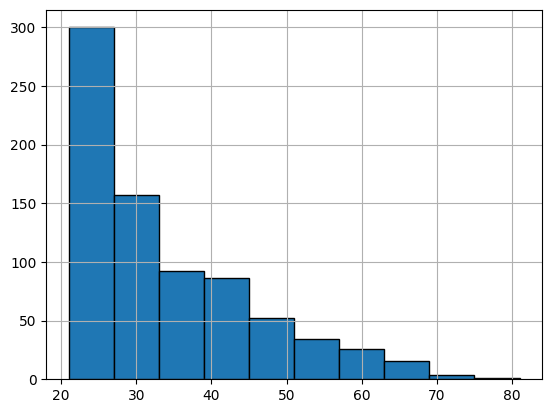

In [9]:
# The histagram of the Age variable was reached.
diabetes_dataset["Age"].hist(edgecolor = "black");

In [10]:
print("Max Age: " + str(diabetes_dataset["Age"].max()) + " Min Age: " + str(diabetes_dataset["Age"].min()))

Max Age: 81 Min Age: 21


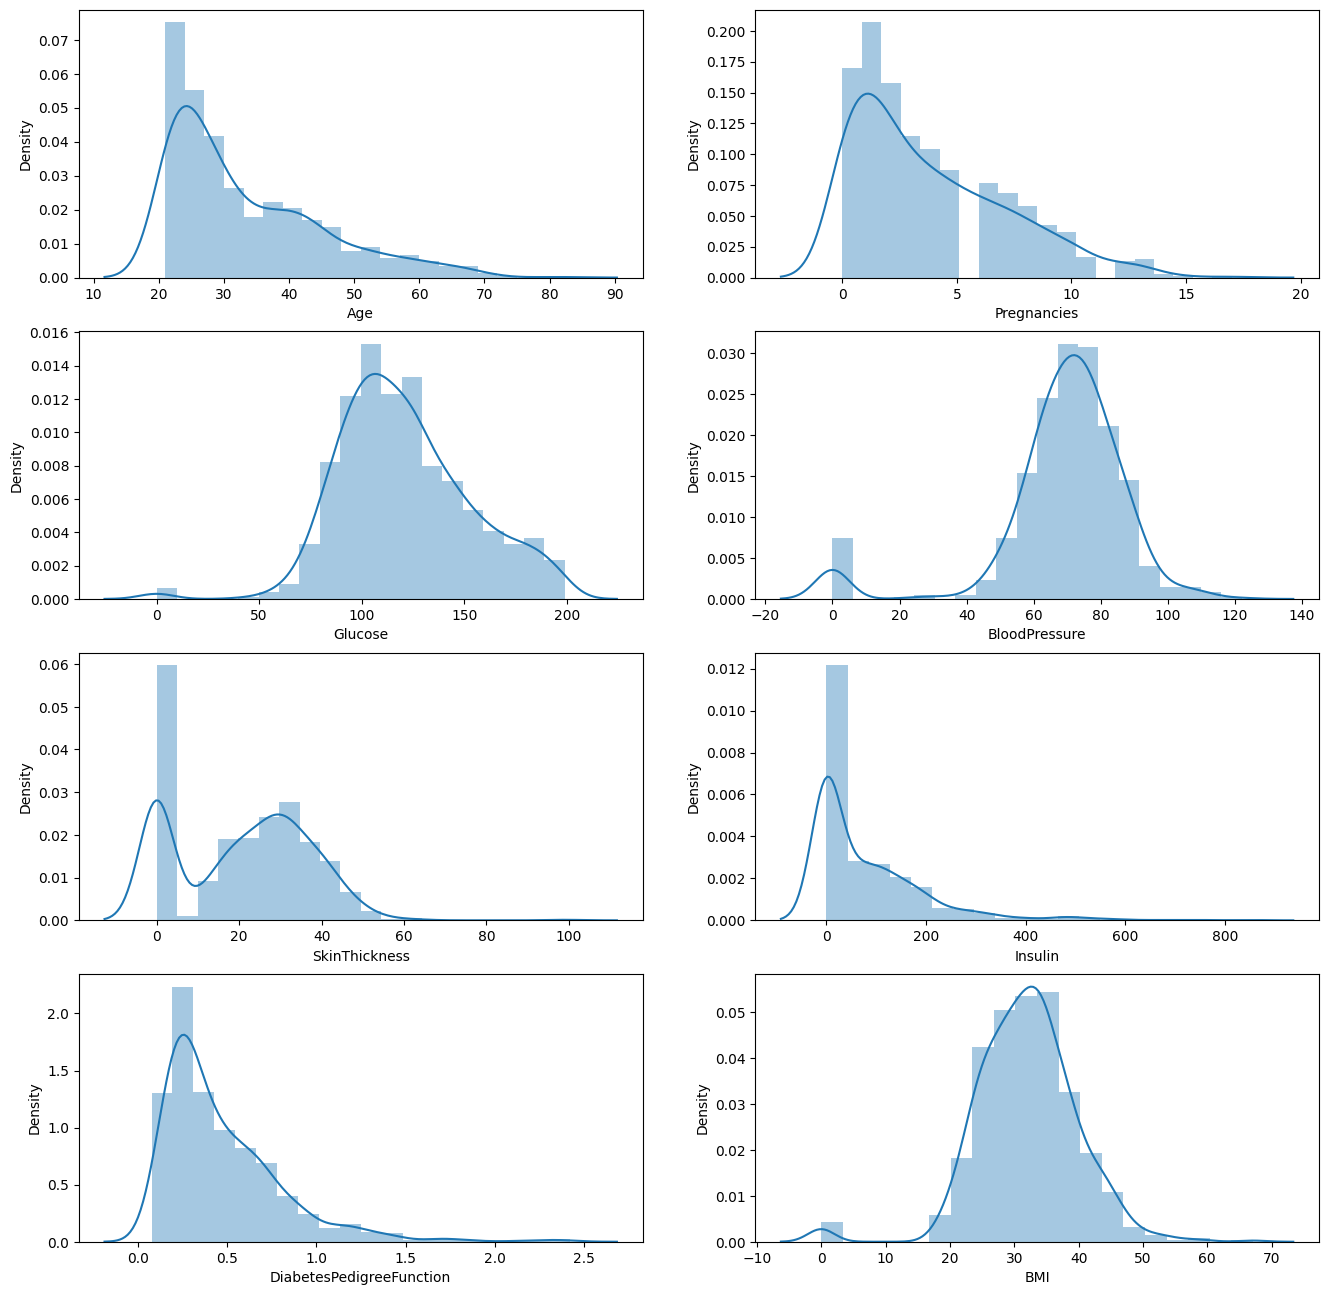

In [11]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4, 2, figsize=(16, 16))

# Plotting the Age variable
sns.distplot(diabetes_dataset.Age, bins=20, ax=ax[0, 0])

# Plotting the Pregnancies variable
sns.distplot(diabetes_dataset.Pregnancies, bins=20, ax=ax[0, 1])

# Plotting the Glucose variable
sns.distplot(diabetes_dataset.Glucose, bins=20, ax=ax[1, 0])

# Plotting the BloodPressure variable
sns.distplot(diabetes_dataset.BloodPressure, bins=20, ax=ax[1, 1])

# Plotting the SkinThickness variable
sns.distplot(diabetes_dataset.SkinThickness, bins=20, ax=ax[2, 0])

# Plotting the Insulin variable
sns.distplot(diabetes_dataset.Insulin, bins=20, ax=ax[2, 1])

# Plotting the DiabetesPedigreeFunction variable
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0])

# Plotting the BMI variable
sns.distplot(diabetes_dataset.BMI, bins=20, ax=ax[3, 1])

# Displaying the plots
plt.show()


In [12]:
diabetes_dataset.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [13]:
diabetes_dataset.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [14]:
diabetes_dataset.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
diabetes_dataset.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [16]:
diabetes_dataset.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [17]:
diabetes_dataset.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [18]:
diabetes_dataset.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [19]:
diabetes_dataset.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


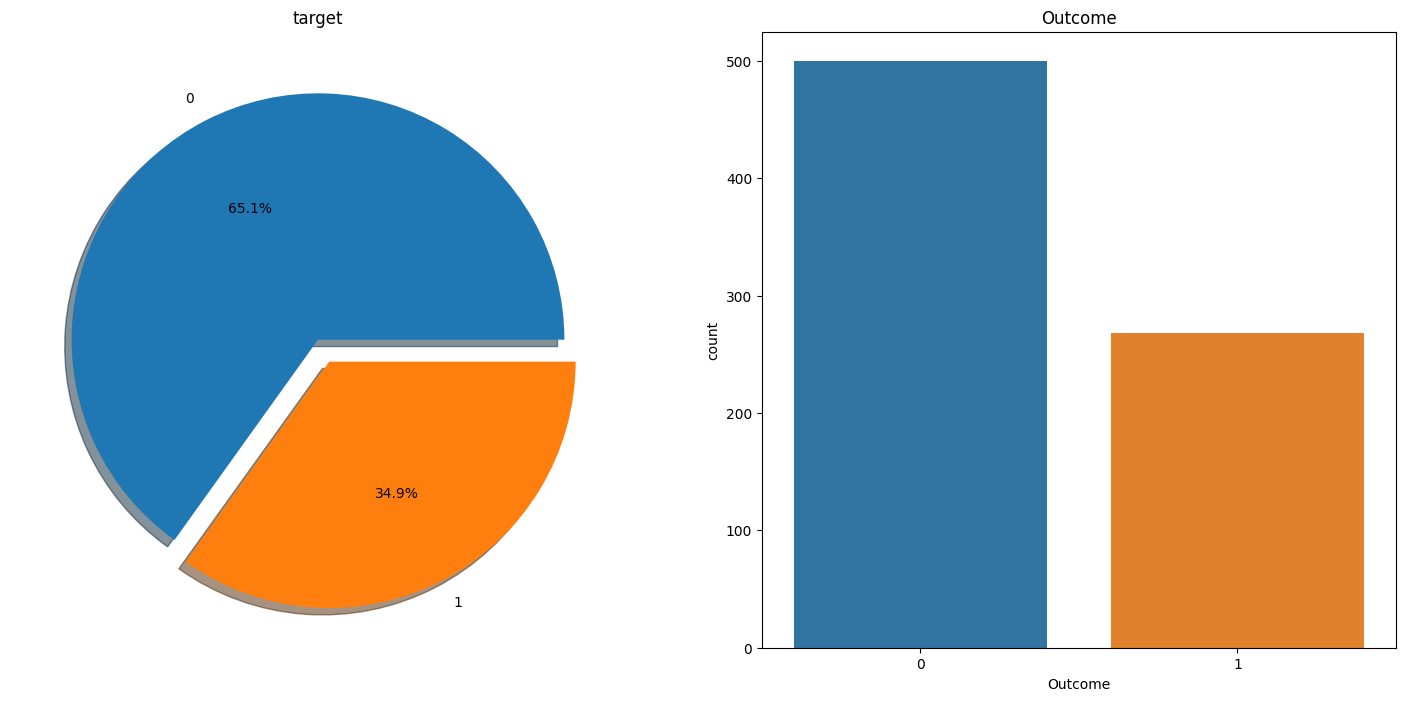

In [20]:
# Create a subplot with 1 row and 2 columns, setting the figure size
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot a pie chart for the distribution of 'Outcome'
# 'explode' parameter is used to highlight the second slice
# 'autopct' parameter adds percentage labels
# 'shadow' parameter adds a shadow effect
diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')  # Set the title for the first subplot
ax[0].set_ylabel('')  # Remove the y-axis label

# Plot a count plot for 'Outcome'
# Explicitly specify the 'data' parameter to avoid errors
sns.countplot(x='Outcome', data=diabetes_dataset, ax=ax[1])

ax[1].set_title('Outcome')  # Set the title for the second subplot
plt.show()  # Display the plots


In [21]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


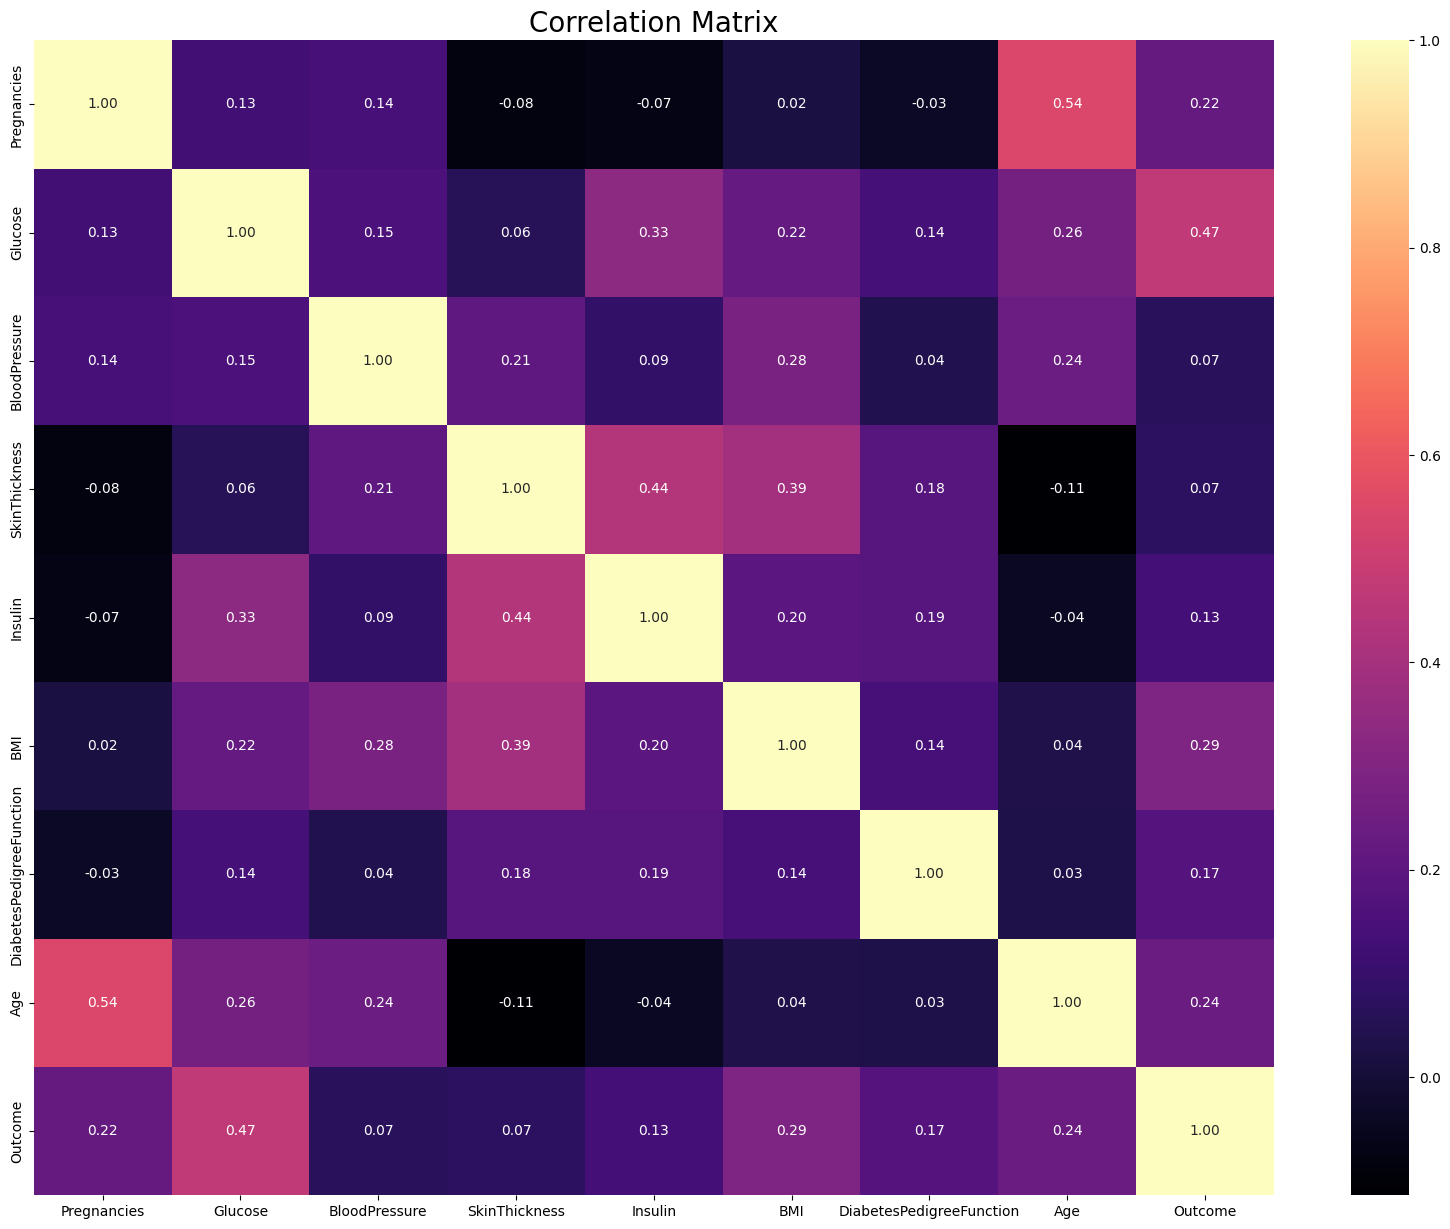

In [22]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize=[20, 15])  # Create a subplot with specified figure size
sns.heatmap(diabetes_dataset.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")  # Plot the heatmap with correlation values
ax.set_title("Correlation Matrix", fontsize=20)  # Set the title for the subplot
plt.show()  # Display the plot


# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on diabetes_dataset.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [23]:
# Replace zero values with NaN for specific columns in the diabetes_dataset
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_dataset[columns_to_replace] = diabetes_dataset[columns_to_replace].replace(0, np.NaN)


In [24]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [25]:
# Now, we can look at where are missing values
diabetes_dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

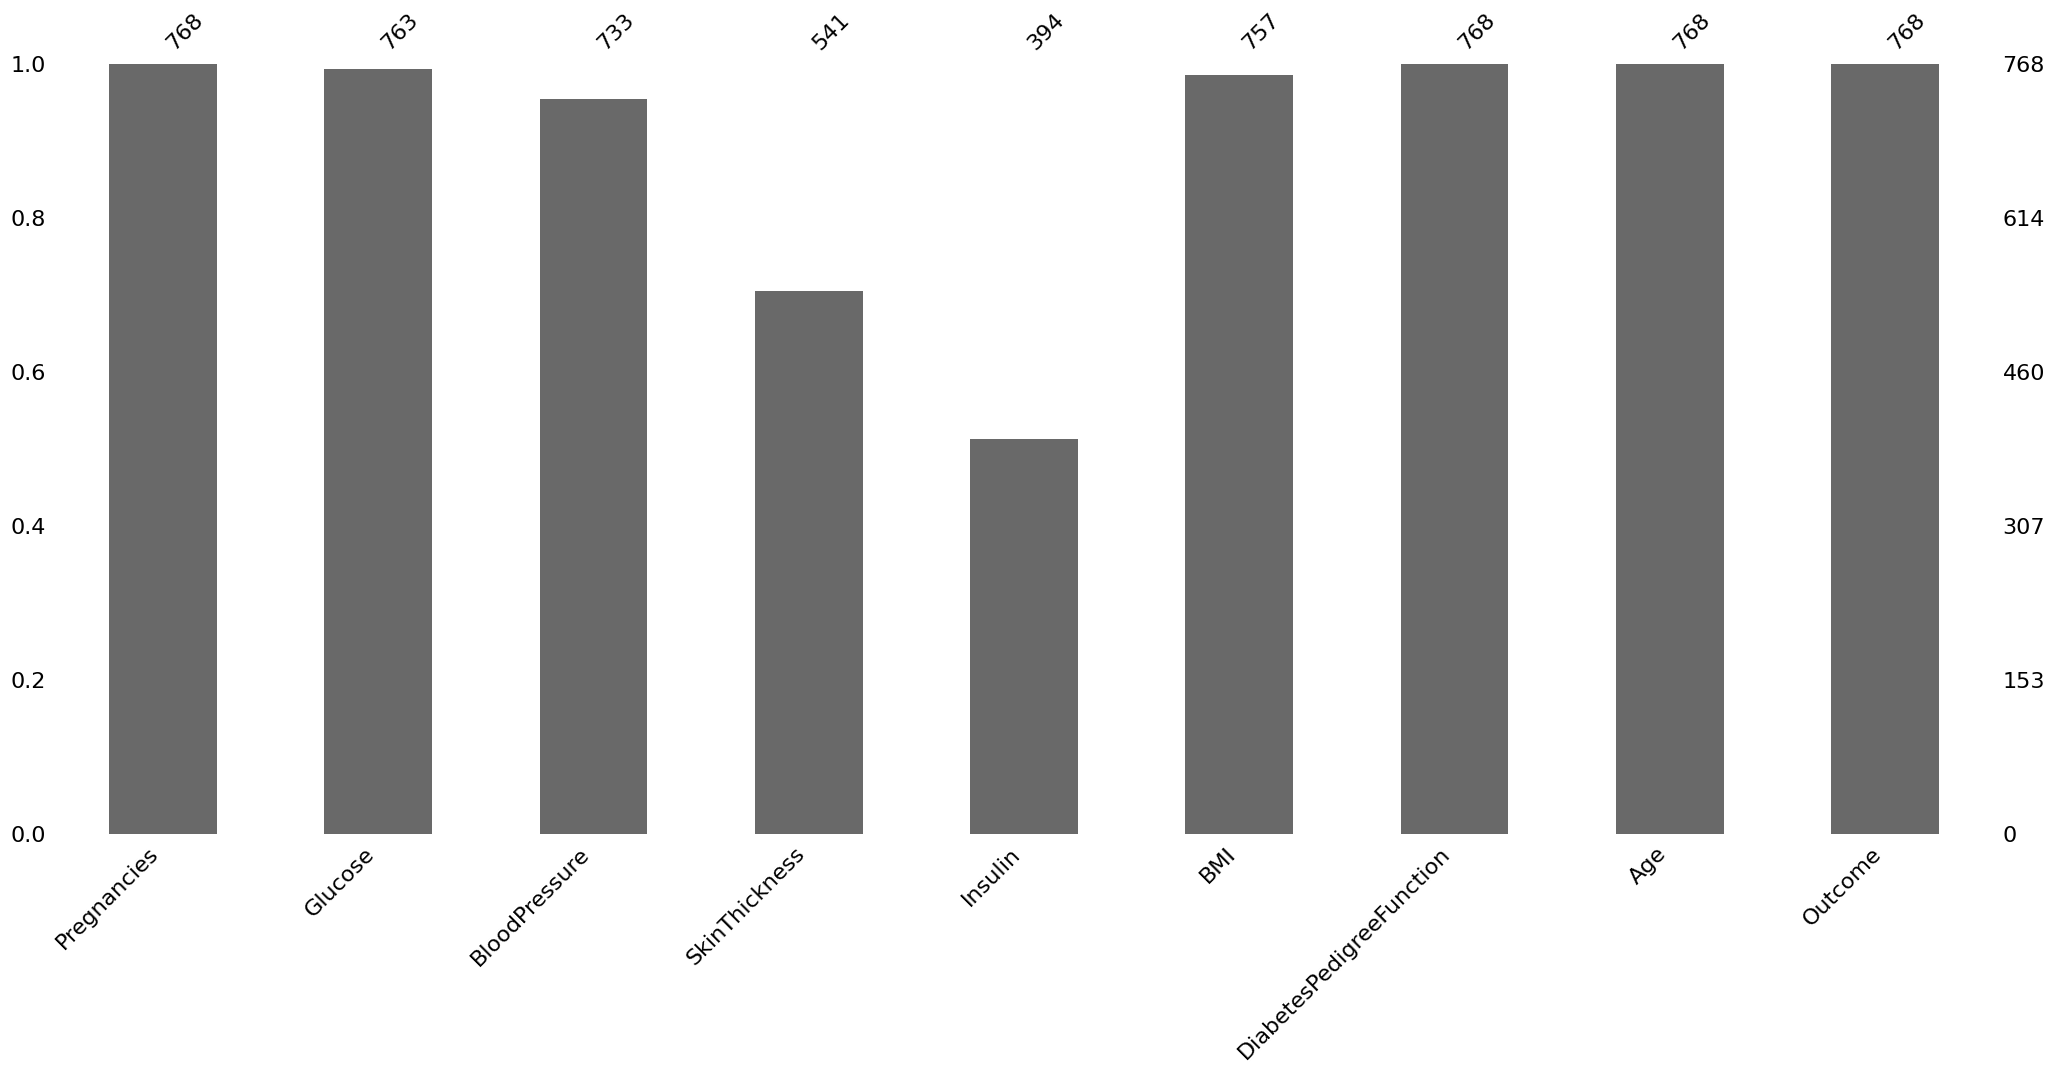

In [26]:
# Visualize missing observations using the missingno library
import missingno as msno

# Plot a bar chart to visualize missing data
msno.bar(diabetes_dataset)


In [27]:
# Define a function to calculate the median values for a variable grouped by the 'Outcome' column
def median_target(var):
    # Filter rows where the variable is not null
    temp = diabetes_dataset[diabetes_dataset[var].notnull()]
    # Group by 'Outcome' and calculate the median for the variable
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [28]:
# Define a function to fill missing values with column-wise medians based on the 'Outcome' variable
def median_target(column):
    # Calculate the median values for each 'Outcome' group
    median_values = diabetes_dataset.groupby('Outcome')[column].median().values
    return {column: median_values}

# Get the list of columns excluding 'Outcome'
columns = diabetes_dataset.columns
columns = columns.drop("Outcome")

# Iterate over columns and fill missing values with corresponding medians
for i in columns:
    # Calculate medians for the column
    medians = median_target(i)
    # Fill missing values for 'Outcome' = 0 with the corresponding median
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 0) & (diabetes_dataset[i].isnull()), i] = medians[i][0]
    # Fill missing values for 'Outcome' = 1 with the corresponding median
    diabetes_dataset.loc[(diabetes_dataset['Outcome'] == 1) & (diabetes_dataset[i].isnull()), i] = medians[i][1]


In [29]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [30]:
# Missing values were filled.
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.2) Outlier Observation Analysis

In [31]:
# Check for outlier observations in the dataset based on the 25% and 75% quartiles
for feature in diabetes_dataset:
    # Calculate quartiles and interquartile range (IQR)
    Q1 = diabetes_dataset[feature].quantile(0.25)
    Q3 = diabetes_dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define upper and lower bounds to identify outliers
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Check for outlier observations and print results
    if diabetes_dataset[(diabetes_dataset[feature] > upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


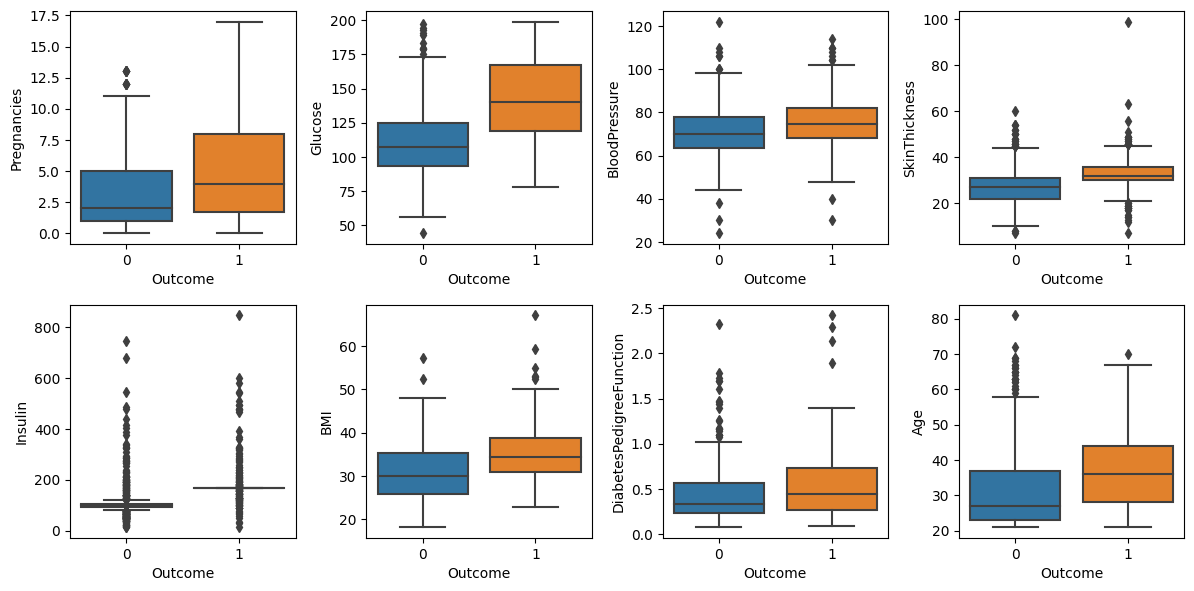

In [32]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))

# Box plot for numerical features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=diabetes_dataset)

plt.tight_layout()
plt.show()


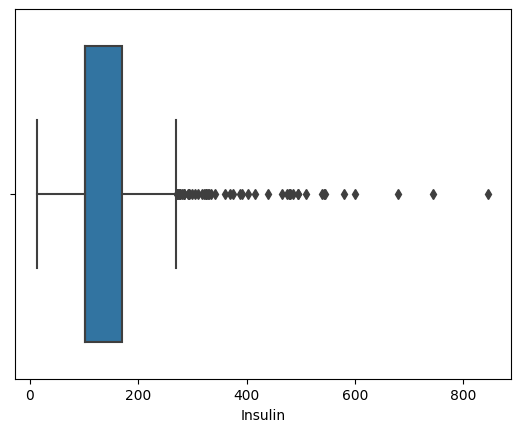

In [33]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = diabetes_dataset["Insulin"]);

In [34]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = diabetes_dataset.Insulin.quantile(0.25)
Q3 = diabetes_dataset.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetes_dataset.loc[diabetes_dataset["Insulin"] > upper,"Insulin"] = upper

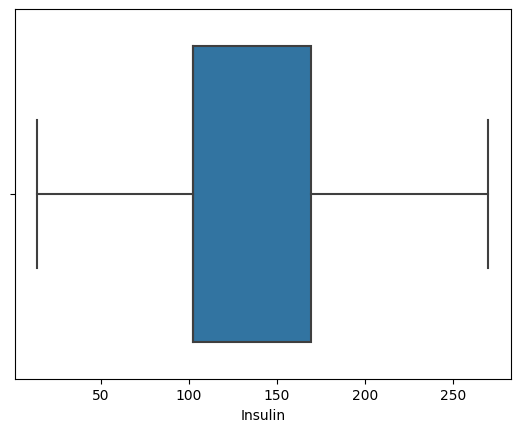

In [35]:
import seaborn as sns
sns.boxplot(x = diabetes_dataset["Insulin"]);

## 2.3)  Local Outlier Factor (LOF)

In [36]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(diabetes_dataset)


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [37]:
diabetes_dataset_scores = lof.negative_outlier_factor_
np.sort(diabetes_dataset_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [38]:
#We choose the threshold value according to lof scores
threshold = np.sort(diabetes_dataset_scores)[7]
threshold

-1.740031580305444

In [39]:
#We delete those that are higher than the threshold
outlier = diabetes_dataset_scores > threshold
diabetes_dataset = diabetes_dataset[outlier]

In [40]:
# The size of the data set was examined.
diabetes_dataset.shape

(760, 9)

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [41]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype="category")
diabetes_dataset["NewBMI"] = NewBMI

# Assigning categories based on BMI ranges
diabetes_dataset.loc[diabetes_dataset["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 18.5) & (diabetes_dataset["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 24.9) & (diabetes_dataset["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 29.9) & (diabetes_dataset["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_dataset.loc[(diabetes_dataset["BMI"] > 34.9) & (diabetes_dataset["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_dataset.loc[diabetes_dataset["BMI"] > 39.9, "NewBMI"] = NewBMI[5]


In [42]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [43]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [44]:
# The operation performed was added to the dataframe.
diabetes_dataset = diabetes_dataset.assign(NewInsulinScore=diabetes_dataset.apply(set_insulin, axis=1))

diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [45]:
# Some intervals were determined according to the glucose variable, and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")
diabetes_dataset["NewGlucose"] = NewGlucose

# Assigning categories based on glucose intervals
diabetes_dataset.loc[diabetes_dataset["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_dataset.loc[(diabetes_dataset["Glucose"] > 70) & (diabetes_dataset["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_dataset.loc[(diabetes_dataset["Glucose"] > 99) & (diabetes_dataset["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_dataset.loc[diabetes_dataset["Glucose"] > 126, "NewGlucose"] = NewGlucose[3]


In [46]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [47]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
diabetes_dataset = pd.get_dummies(diabetes_dataset, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [48]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [49]:
# Selecting specific categorical columns from the diabetes dataset
categorical_diabetes_dataset = diabetes_dataset[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
                                                  'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]


In [50]:
categorical_diabetes_dataset.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,True,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [51]:
# Assigning features (X) and target variable (y)
y = diabetes_dataset["Outcome"]
X = diabetes_dataset.drop(["Outcome", 'NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight', 'NewBMI_Underweight',
                            'NewInsulinScore_Normal', 'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)
cols = X.columns
index = X.index


In [52]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [53]:
# Standardizing the features for model performance improvement
from sklearn.preprocessing import RobustScaler

# Fit and transform the data using RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)

# Convert the standardized array back to a DataFrame with original column names and index
X = pd.DataFrame(X, columns=cols, index=index)


In [54]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [55]:
X = pd.concat([X,categorical_diabetes_dataset], axis = 1)

In [56]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.4,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.0,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.4,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,False,False,True,False,True,False,True,False,False
4,-0.6,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


In [57]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# 5) Base Models

In [58]:
# Validation scores of all base models

# Create a list to store the models
models = []

# Append each model along with its name to the list
models.append(('LR', LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=12345)))
models.append(('RF', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', random_state=12345)))
models.append(('XGB', GradientBoostingClassifier(random_state=12345)))
models.append(("LightGBM", LGBMClassifier(random_state=12345)))

# Create empty lists to store the results
results = [] 
names = []


LR: 0.852632 (0.005263)
KNN: nan (nan)
CART: 0.852632 (0.021053)
RF: 0.881579 (0.007895)
SVM: 0.860526 (0.002632)
XGB: 0.878947 (0.002632)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 131, number of negative: 249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 380, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344737 -> initscore=-0.642256
[LightGBM] [Info] Start training from score -0.642256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

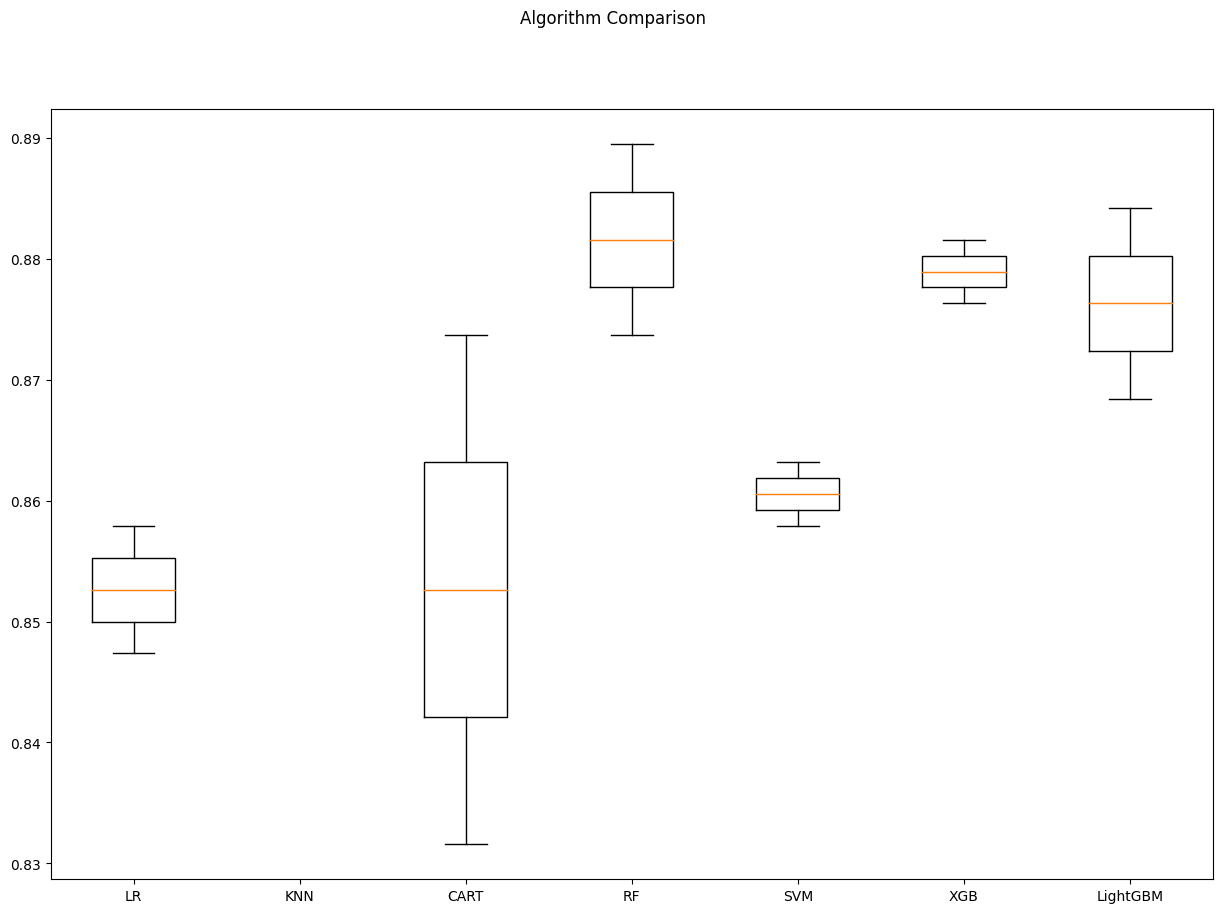

In [59]:
# Perform cross-validation for each model and print the results
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=2, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Create a boxplot to compare the algorithms
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# 6) Model Tuning

### 1) Random Forests Tuning

In [60]:
# Define the hyperparameter grid for Random Forest
rf_params = {
    "n_estimators": [100, 200, 500, 1000],
    "max_features": [3, 5, 7],
    "min_samples_split": [2, 5, 10, 30],
    "max_depth": [3, 5, 8, None]
}


In [61]:
# Create a Random Forest model with a specified random seed
rf_model = RandomForestClassifier(random_state=12345)


In [62]:
# Perform grid search with cross-validation
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 2,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


In [63]:
# Display the best hyperparameters
gs_cv.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 500}

### 1.1) Final Model Installation

In [64]:
# Create a RandomForestClassifier with the best hyperparameters
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [65]:
# Fit the tuned RandomForestClassifier to the data
rf_tuned = rf_tuned.fit(X,y)

In [66]:
# Perform cross-validation with the tuned RandomForestClassifier
cv_score_rf_tuned = cross_val_score(rf_tuned, X, y, cv=2).mean()
cv_score_rf_tuned


0.8789473684210527

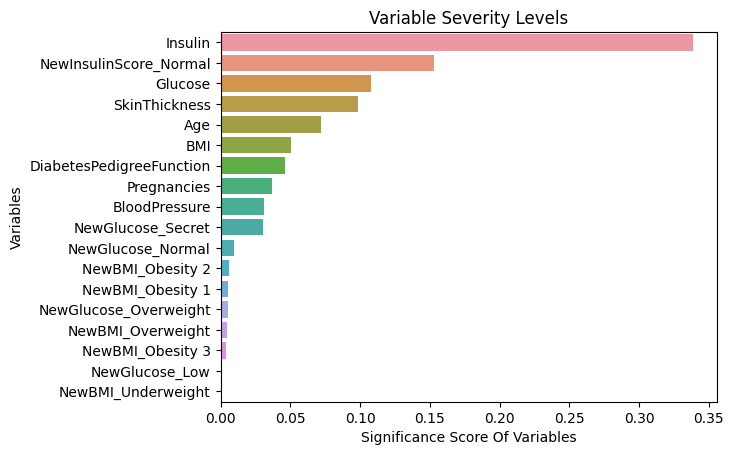

In [67]:
# Plotting feature importances for the tuned RandomForestClassifier
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a horizontal bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels and title
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")

# Display the plot
plt.show()


### 2) LightGBM Tuning

In [68]:
# LightGBM base model
lgbm = LGBMClassifier(random_state=12345)

# Cross-validation scores for the LightGBM base model
cv_scores_lgbm_base = cross_val_score(lgbm, X, y, cv=2, scoring="accuracy")

# Display the mean and standard deviation of the cross-validation scores
print(f"LightGBM Base Model - Cross-Validation Mean Accuracy: {cv_scores_lgbm_base.mean():.4f}")
print(f"LightGBM Base Model - Cross-Validation Standard Deviation: {cv_scores_lgbm_base.std():.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 131, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 380, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344737 -> initscore=-0.642256
[LightGBM] [Info] Start training from score -0.642256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [69]:
# Define the hyperparameter grid for LightGBM
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [70]:
# Perform grid search with cross-validation
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 2, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 2 folds for each of 45 candidates, totalling 90 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 263, number of negative: 497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346053 -> initscore=-0.636436
[LightGBM] [Info] Start training from score -0.636436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [71]:
# Display the best hyperparameters
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

### 2.1) Final Model Installation

In [72]:
# Create a LGBMClassifier with the best hyperparameters
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 263, number of negative: 497
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 760, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346053 -> initscore=-0.636436
[LightGBM] [Info] Start training from score -0.636436
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [73]:
cross_val_score(lgbm_tuned, X, y, cv = 2).mean()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 131, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 380, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.344737 -> initscore=-0.642256
[LightGBM] [Info] Start training from score -0.642256
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

0.8894736842105263

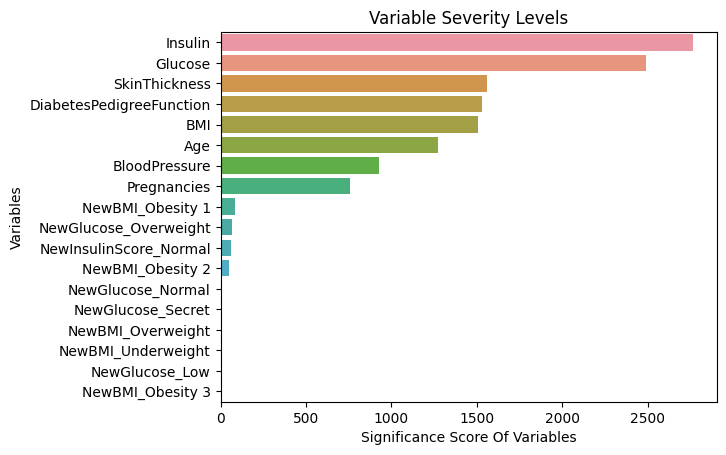

In [74]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


### 3) XGBoost Tuning

In [75]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [76]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [77]:

xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 2, n_jobs = -1, verbose = 2).fit(X, y)

Fitting 2 folds for each of 720 candidates, totalling 1440 fits


In [78]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 0.5,
 'n_estimators': 100,
 'subsample': 1.0}

### 3.1) Final Model Installation

In [79]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [80]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.8868421052631579

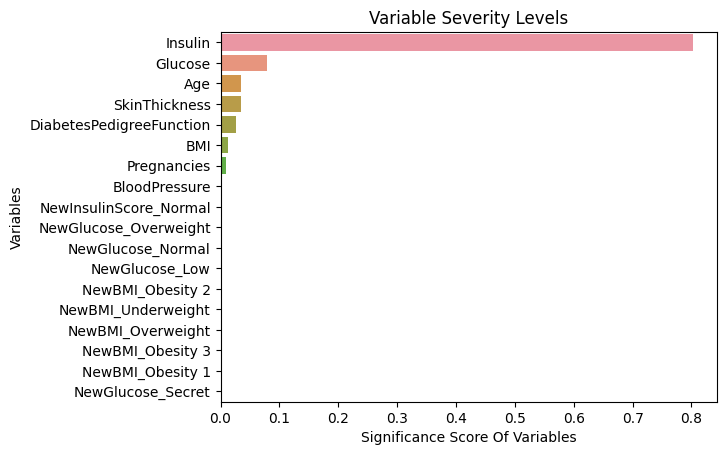

In [81]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()

# 7) Comparison of Final Models

In [82]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# evaluate each model in turn
results = []
names = []

RF: 0.897368 (0.034211)
XGB: 0.901316 (0.028373)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 236, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.345029 -> initscore=-0.640961
[LightGBM] [Info] Start training from score -0.640961
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

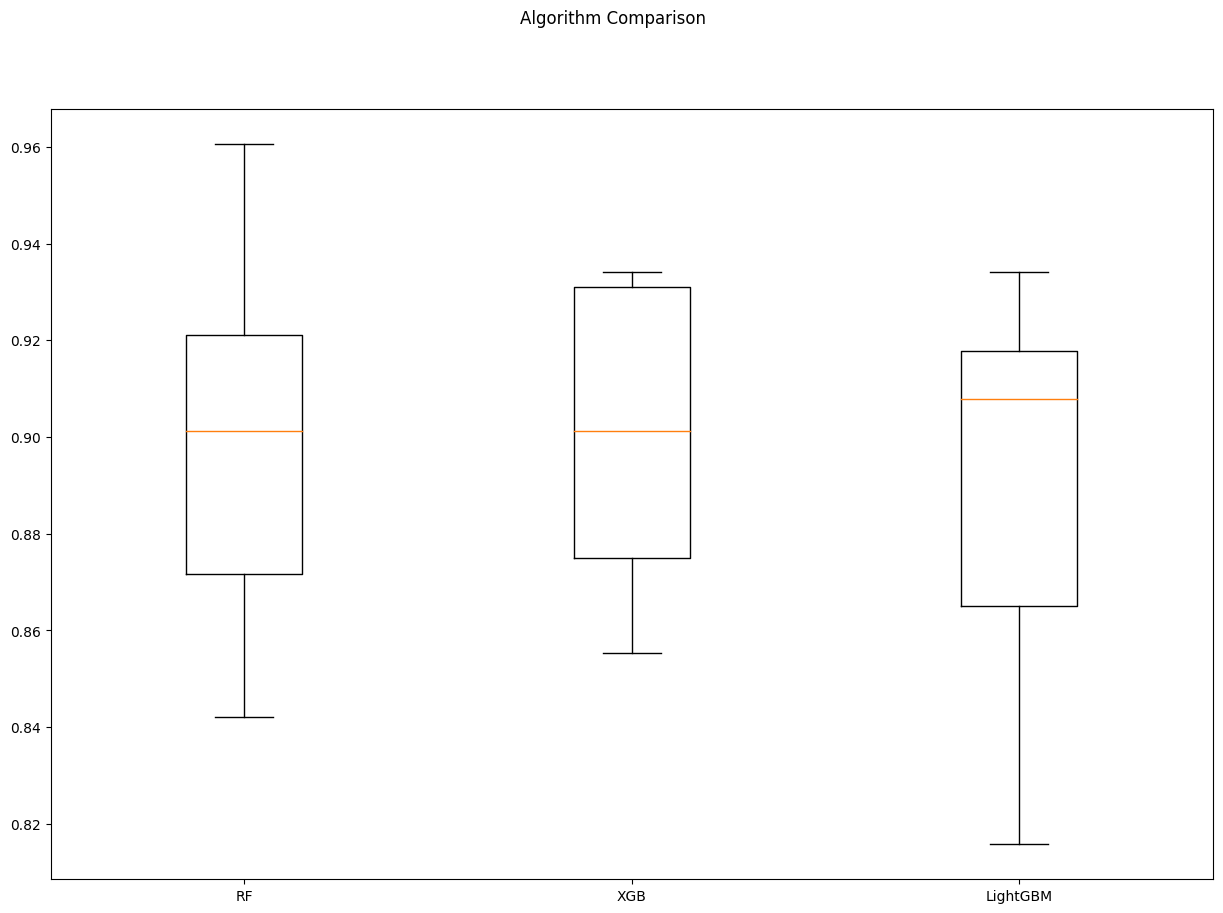

In [83]:
for name, model in models:
    
        kfold = KFold(n_splits = 10)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8) Reporting

The aim of this study was to create classification models for the diabetes data set and to predict whether a person is sick by establishing models and to obtain maximum validation scores in the established models. The work done is as follows:

1) Diabetes Data Set read.

2) With Exploratory Data Analysis; The data set's structural data were checked.
The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

3) Data Preprocessing section;
diabetes_dataset for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

4) During Model Building;
Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.

5) Result;
The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)